# A more dense CNN for MNIST

We can see here that the model with the following criteria:
- 1 Convolution Hidden Layer
   - 8 Convolution Filter
   - Relu Activation
   - 1 Max Pooling layer with stride = 2
   - `he_normal` initializer
- 1 Hidden layer
   - 100 nodes in layer
   - Relu Activation
   - `he_normal` initializer
- Sparse Categorical Cross Entropy loss function
- Adam optimizer

In [1]:
import mnist_data_load
import logging
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
assert len(tf.config.experimental.list_physical_devices('GPU')) != 0

In [3]:
enbale_info_logging = True
if enbale_info_logging:
    logging.getLogger().setLevel(logging.INFO)

In [4]:
random_seed = 100
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## Load data

In [7]:
train_data, validation_data, test_data = mnist_data_load.load_data(seed=random_seed)

INFO:root:handling label: 1
INFO:root:handling label: 0
INFO:root:handling label: 4
INFO:root:handling label: 7
INFO:root:handling label: 3
INFO:root:handling label: 5
INFO:root:handling label: 8
INFO:root:handling label: 9
INFO:root:handling label: 2
INFO:root:handling label: 6


In [8]:
x_train, y_train = mnist_data_load.get_label_and_features_from_dataframe(train_data)

In [9]:
logging.info(x_train.shape)
logging.info(y_train.shape)
logging.info(x_train.dtype)

INFO:root:(30360, 28, 28, 1)
INFO:root:(30360,)
INFO:root:float64


## Defining Model

In [10]:
def get_model():
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3, 3), kernel_initializer='he_normal',
                     activation='relu', input_shape=(28, 28, 1))) 
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(units=100, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [11]:
model_conv1_sparse = get_model()

In [12]:
model_conv1_sparse.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               135300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 136,390
Trainable params: 136,390
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_conv1_sparse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

### Training the model

In [14]:
history_sparse = model_conv1_sparse.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
949/949 [==============================] - 2s 2ms/step - loss: 6.3500 - sparse_categorical_accuracy: 0.8743
Epoch 2/5
949/949 [==============================] - 2s 2ms/step - loss: 0.5436 - sparse_categorical_accuracy: 0.9105
Epoch 3/5
949/949 [==============================] - 2s 2ms/step - loss: 0.3189 - sparse_categorical_accuracy: 0.9349
Epoch 4/5
949/949 [==============================] - 2s 2ms/step - loss: 0.2596 - sparse_categorical_accuracy: 0.9436
Epoch 5/5
949/949 [==============================] - 2s 2ms/step - loss: 0.1839 - sparse_categorical_accuracy: 0.9569


### Validating the model

In [15]:
x_val, y_val = mnist_data_load.get_label_and_features_from_dataframe(validation_data)

In [16]:
logging.info(x_val.shape)
logging.info(y_val.shape)
logging.info(x_val.dtype)

INFO:root:(3790, 28, 28, 1)
INFO:root:(3790,)
INFO:root:float64


In [17]:
history_sparse_validation = model_conv1_sparse.evaluate(x_val, y_val, batch_size=32, verbose=1)

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - sparse_categorical_accuracy: 0.9454


In [18]:
model_conv1_sparse.save('cnn_1x8_sparse.h5')

## Checking Model performance

In [19]:
x_test, y_test = mnist_data_load.get_label_and_features_from_dataframe(train_data)

In [20]:
logging.info(x_test.shape)
logging.info(y_train.shape)
logging.info(x_train.dtype)

INFO:root:(30360, 28, 28, 1)
INFO:root:(30360,)
INFO:root:float64


In [21]:
prediction = model_conv1_sparse.predict(x_train, verbose=1)

949/949 [==============================] - 1s 1ms/step


In [22]:
logging.info(prediction.shape)

INFO:root:(30360, 10)


In [23]:
prediction_index = np.argmax(prediction, axis=1)

In [24]:
logging.info(prediction_index.shape)

INFO:root:(30360,)


In [25]:
prediciton_result = np.sum(prediction_index == y_test)

In [26]:
accuracy = prediciton_result/len(y_train)
logging.info(accuracy)

INFO:root:0.958102766798419


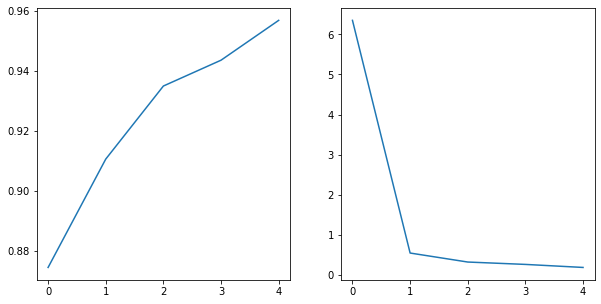

In [27]:
plt.figure(figsize=(10, 5))
plt1 = plt.subplot(1, 2, 1)
plt1.plot(history_sparse.history['sparse_categorical_accuracy'], label='training')
plt2 = plt.subplot(1, 2, 2)
plt2.plot(history_sparse.history['loss'], label='validation')
plt.show()

## Model Visualization

### Intermediate Model Generation

In [28]:
model_conv1_sparse.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               135300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 136,390
Trainable params: 136,390
Non-trainable params: 0
_________________________________________________________________


In [31]:
conv1_layer = model_conv1_sparse.get_layer('conv2d')
conv1_layer.get_config()

{'name': 'conv2d',
 'trainable': True,
 'batch_input_shape': (None, 28, 28, 1),
 'dtype': 'float32',
 'filters': 8,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 2.0,
   'mode': 'fan_in',
   'distribution': 'truncated_normal',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [32]:
model_intermediate = Sequential()
model_intermediate.add(conv1_layer)

In [58]:
model_intermediate.save('cnn_1x8_sparse_interm.h5')

### Model Weights

In [47]:
conv1_layer_w = conv1_layer.get_weights()

In [48]:
logging.info(type(conv1_layer_w))
conv1_layer_w = np.array(conv1_layer_w, dtype=object)
logging.info(conv1_layer_w.shape)

INFO:root:<class 'list'>
INFO:root:(2,)


In [50]:
for w in conv1_layer_w:
    logging.info(w.shape)

INFO:root:(3, 3, 1, 8)
INFO:root:(8,)


Here we can see that the 1st weight denotes the filter values which has a dimension 3x3x1 and as there are 8 filters used, so we have the depth of 8 i.e. 3x3x1x8

The 2nd weight denotes the bias that was added to these weights.

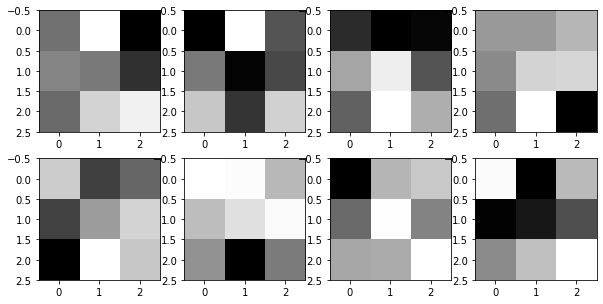

In [53]:
plt.figure(figsize=(10, 5))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(conv1_layer_w[0][:, :, :, i].reshape((3,3)), cmap='gray')
plt.show()

### Model Convolution output visualization

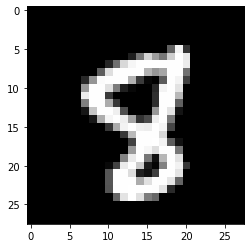

In [54]:
rand_index = random.randint(0, x_test.shape[0])
example_data = x_test[rand_index]
plt.imshow(example_data, cmap='gray')
plt.show()

In [56]:
conv_output = model_intermediate.predict(example_data.reshape((1, 28, 28, 1)))

In [57]:
logging.info(conv_output.shape)

INFO:root:(1, 26, 26, 8)


In [63]:
def conv1_test_output(num_examples):
    random_index = [random.randint(0, x_test.shape[0]) for i in range(num_examples)]
    random_feats = x_test[random_index]
    assert len(random_feats.shape) == 4
    predicts = model_intermediate.predict(random_feats)
    for index, p in enumerate(predicts):
        fig = plt.figure(figsize=(16, 3), constrained_layout=True)
        grid = gridspec.GridSpec(1, 3, figure=fig)
        grid0 = grid[0]
        grid1 = grid[1].subgridspec(2, 4)
        grid2 = grid[2].subgridspec(2, 4)
        fig.add_subplot(grid0).imshow(random_feats[index], cmap='gray')
        for i in range(8):
            row = i // 4
            col = i % 4
            subplt = fig.add_subplot(grid1[row, col])
            subplt.imshow(conv1_layer_w[0][:, :, :, i].reshape((3,3)), cmap='gray')
        for i in range(8):
            row = i //4
            col = i % 4
            subplt = fig.add_subplot(grid2[row, col])
            subplt.imshow(p[:, :, i], cmap='gray')
        plt.show()

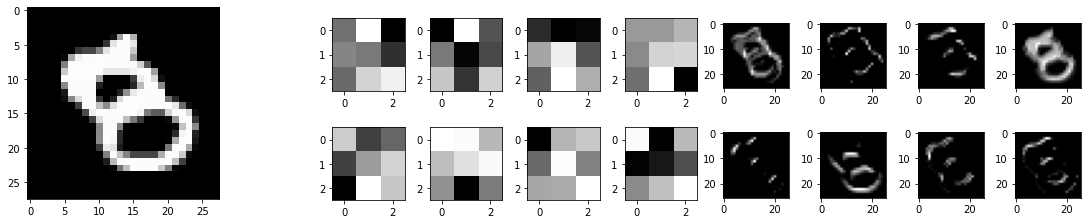

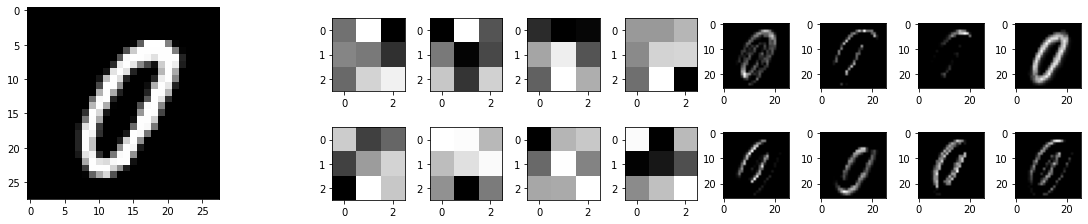

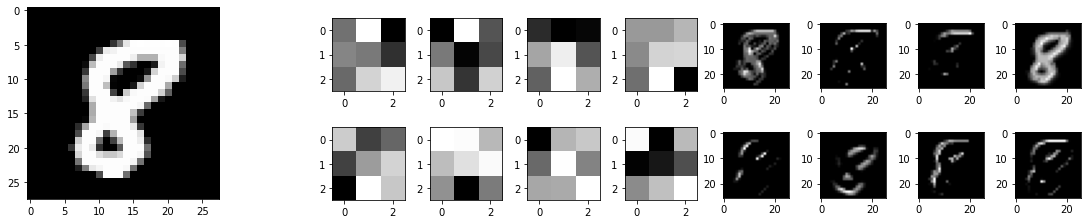

In [64]:
conv1_test_output(3)